# Data preprocessing
- the spectrum data needs to be normalized as well as the conditional vector

## Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_stg3 = pd.read_csv('data/closest_times_stg3_no_change.csv')
data_stg4 = pd.read_csv('data/closest_times_stg4_no_change.csv')

In [3]:
data_stg3.head()

,Time_spectrum,Intensities,Wavelengths,Time_parameters,Stage3_OutputPower,Stage3_Piezo,Stage4_OutputPower,Stage4_Piezo,Stage3_Stepper,Stage4_Stepper,idx
0,2024-06-17 08:59:33.032441616,"[0.416987, -7.878997, -3.094142, 8.856287, -2....","[634.835144, 635.296997, 635.758911, 636.22082...",2024-06-17 08:59:32.858325005,0.162824,0.0,0.265351,0.0,-176387.0,-289957.0,143
1,2024-06-17 08:59:34.139300823,"[-3.583013, -4.878997, -1.094142, 6.856287, -4...","[634.835144, 635.296997, 635.758911, 636.22082...",2024-06-17 08:59:32.858325005,0.162824,0.0,0.265351,0.0,-176387.0,-289957.0,143
2,2024-06-17 09:09:29.938064575,"[4.416987, -6.878997, -7.094142, 7.856287, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",2024-06-17 09:09:28.918118000,-0.015209,0.0,0.085277,0.0,-176387.0,-289957.0,2718
3,2024-06-17 09:09:30.844064236,"[2.416987, -2.878997, -7.094142, 4.856287, -0....","[634.835144, 635.296997, 635.758911, 636.22082...",2024-06-17 09:09:28.918118000,-0.015209,0.0,0.085277,0.0,-176387.0,-289957.0,2718
4,2024-06-17 09:09:31.748065472,"[-0.583013, -4.878997, -5.094142, 7.856287, -1...","[634.835144, 635.296997, 635.758911, 636.22082...",2024-06-17 09:09:28.918118000,-0.015209,0.0,0.085277,0.0,-176387.0,-289957.0,2718


In [4]:
data_stg4.head()

,Time_spectrum,Intensities,Wavelengths,Time_parameters,Stage3_OutputPower,Stage3_Piezo,Stage4_OutputPower,Stage4_Piezo,Stage3_Stepper,Stage4_Stepper,idx
0,2024-06-17 08:59:14.669630527,"[2.04433, -6.42062, -9.35264, 8.78973, -0.9214...","[634.83514, 635.297, 635.75891, 636.22083, 636...",2024-06-17 08:59:14.472586155,0.121451,0.0,0.157127,0.0,-176387.0,-289957.0,88
1,2024-06-17 08:59:15.522633553,"[0.04433, -4.42062, -5.35264, 8.78973, 1.07852...","[634.83514, 635.297, 635.75891, 636.22083, 636...",2024-06-17 08:59:14.472586155,0.121451,0.0,0.157127,0.0,-176387.0,-289957.0,88
2,2024-06-17 08:59:33.183339119,"[-1.95567, -10.42062, -11.35264, 6.78973, -4.9...","[634.83514, 635.297, 635.75891, 636.22083, 636...",2024-06-17 08:59:32.858325005,0.162824,0.0,0.265351,0.0,-176387.0,-289957.0,143
3,2024-06-17 08:59:34.237629414,"[2.04433, -6.42062, -9.35264, 12.78973, -2.921...","[634.83514, 635.297, 635.75891, 636.22083, 636...",2024-06-17 08:59:32.858325005,0.162824,0.0,0.265351,0.0,-176387.0,-289957.0,143
4,2024-06-17 09:01:04.464854240,"[8.04433, -0.42062, -9.35264, 8.78973, 1.07852...","[634.83514, 635.297, 635.75891, 636.22083, 636...",2024-06-17 09:01:04.373449802,0.149876,0.0,0.240917,0.0,-176387.0,-289957.0,516


# Conditional vectors

In [5]:
def print_feature_statistics(data):
    # List of columns to analyze
    features = [
        "Stage3_OutputPower",
        "Stage3_Piezo",
        "Stage4_OutputPower",
        "Stage4_Piezo",
        "Stage3_Stepper",
        "Stage4_Stepper"
    ]
    
    for feature in features:
        if feature in data.columns:
            # Calculate statistics
            min_val = np.min(data[feature])
            max_val = np.max(data[feature])
            mean_val = np.mean(data[feature])
            median_val = np.median(data[feature])
            variance_val = np.var(data[feature])

            # Print statistics
            print(f"\nStatistics for {feature}:")
            print(f"  Minimum: {min_val}")
            print(f"  Maximum: {max_val}")
            print(f"  Mean: {mean_val}")
            print(f"  Median: {median_val}")
            print(f"  Variance: {variance_val}")
        else:
            print(f"\nFeature {feature} not found in the DataFrame")



In [6]:
print_feature_statistics(data_stg3)


Statistics for Stage3_OutputPower:
  Minimum: -0.018081
  Maximum: 0.244112
  Mean: 0.010666067663551401
  Median: 0.005178
  Variance: 0.0005356643461191971

Statistics for Stage3_Piezo:
  Minimum: 0.0
  Maximum: 0.0
  Mean: 0.0
  Median: 0.0
  Variance: 0.0

Statistics for Stage4_OutputPower:
  Minimum: 0.082821
  Maximum: 0.630297
  Mean: 0.08785124336448599
  Median: 0.084941
  Variance: 0.00032433285374078145

Statistics for Stage4_Piezo:
  Minimum: 0.0
  Maximum: 0.0
  Mean: 0.0
  Median: 0.0
  Variance: 0.0

Statistics for Stage3_Stepper:
  Minimum: -746368.0
  Maximum: 151276.0
  Mean: -55139.9368224299
  Median: -176387.0
  Variance: 25830920081.47399

Statistics for Stage4_Stepper:
  Minimum: -289957.0
  Maximum: -289957.0
  Mean: -289957.0
  Median: -289957.0
  Variance: 0.0


In [24]:
print_feature_statistics(data_stg4)


Statistics for Stage3_OutputPower:
  Minimum: -0.018081
  Maximum: 0.244112
  Mean: 0.010874860863095238
  Median: 0.005178
  Variance: 0.0005613533769271125

Statistics for Stage3_Piezo:
  Minimum: 0.0
  Maximum: 0.0
  Mean: 0.0
  Median: 0.0
  Variance: 0.0

Statistics for Stage4_OutputPower:
  Minimum: 0.079361
  Maximum: 0.630297
  Mean: 0.08790789769345239
  Median: 0.084941
  Variance: 0.0003393702977651895

Statistics for Stage4_Piezo:
  Minimum: 0.0
  Maximum: 0.0
  Mean: 0.0
  Median: 0.0
  Variance: 0.0

Statistics for Stage3_Stepper:
  Minimum: -746368.0
  Maximum: 151276.0
  Mean: -55604.42671130953
  Median: -176387.0
  Variance: 25787257820.89338

Statistics for Stage4_Stepper:
  Minimum: -289957.0
  Maximum: -289957.0
  Mean: -289957.0
  Median: -289957.0
  Variance: 0.0


## Create dataset

In [7]:
# Create 'cond_vector' as a numpy array
columns_for_cond_vector = [
    'Stage3_OutputPower',
    'Stage3_Piezo',
    'Stage3_Stepper',
]
data_stg3['cond_vector'] = data_stg3[columns_for_cond_vector].apply(lambda row: np.array(row.values), axis=1)

# Keep only the required columns
processed_data_stg3 = data_stg3[['Time_spectrum', 'Time_parameters', 'idx', 'Intensities', 'cond_vector']]

# Rename columns
processed_data_stg3.rename(columns={
    'Intensities': 'intensities',
    'Time_spectrum': 'time_spectrum',
    'Time_parameters': 'time_parameters'
}, inplace=True)

processed_data_stg3.head()

/tmp/ipykernel_134673/4027568728.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data_stg3.rename(columns={


,time_spectrum,time_parameters,idx,intensities,cond_vector
0,2024-06-17 08:59:33.032441616,2024-06-17 08:59:32.858325005,143,"[0.416987, -7.878997, -3.094142, 8.856287, -2....","[0.162824, 0.0, -176387.0]"
1,2024-06-17 08:59:34.139300823,2024-06-17 08:59:32.858325005,143,"[-3.583013, -4.878997, -1.094142, 6.856287, -4...","[0.162824, 0.0, -176387.0]"
2,2024-06-17 09:09:29.938064575,2024-06-17 09:09:28.918118000,2718,"[4.416987, -6.878997, -7.094142, 7.856287, -1....","[-0.015209, 0.0, -176387.0]"
3,2024-06-17 09:09:30.844064236,2024-06-17 09:09:28.918118000,2718,"[2.416987, -2.878997, -7.094142, 4.856287, -0....","[-0.015209, 0.0, -176387.0]"
4,2024-06-17 09:09:31.748065472,2024-06-17 09:09:28.918118000,2718,"[-0.583013, -4.878997, -5.094142, 7.856287, -1...","[-0.015209, 0.0, -176387.0]"


In [8]:
# Create 'cond_vector' as a numpy array
columns_for_cond_vector = [
    'Stage3_OutputPower',
    'Stage3_Piezo',
    'Stage4_OutputPower',
    'Stage4_Piezo',
    'Stage3_Stepper',
    'Stage4_Stepper'
]
data_stg4['cond_vector'] = data_stg4[columns_for_cond_vector].apply(lambda row: np.array(row.values), axis=1)

# Keep only the required columns
processed_data_stg4 = data_stg4[['Time_spectrum', 'Time_parameters', 'idx', 'Intensities', 'cond_vector']]

# Rename columns
processed_data_stg4.rename(columns={
    'Intensities': 'intensities',
    'Time_spectrum': 'time_spectrum',
    'Time_parameters': 'time_parameters'
}, inplace=True)

processed_data_stg4.head()

/tmp/ipykernel_134673/2422366681.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data_stg4.rename(columns={


,time_spectrum,time_parameters,idx,intensities,cond_vector
0,2024-06-17 08:59:14.669630527,2024-06-17 08:59:14.472586155,88,"[2.04433, -6.42062, -9.35264, 8.78973, -0.9214...","[0.121451, 0.0, 0.157127, 0.0, -176387.0, -289..."
1,2024-06-17 08:59:15.522633553,2024-06-17 08:59:14.472586155,88,"[0.04433, -4.42062, -5.35264, 8.78973, 1.07852...","[0.121451, 0.0, 0.157127, 0.0, -176387.0, -289..."
2,2024-06-17 08:59:33.183339119,2024-06-17 08:59:32.858325005,143,"[-1.95567, -10.42062, -11.35264, 6.78973, -4.9...","[0.162824, 0.0, 0.265351, 0.0, -176387.0, -289..."
3,2024-06-17 08:59:34.237629414,2024-06-17 08:59:32.858325005,143,"[2.04433, -6.42062, -9.35264, 12.78973, -2.921...","[0.162824, 0.0, 0.265351, 0.0, -176387.0, -289..."
4,2024-06-17 09:01:04.464854240,2024-06-17 09:01:04.373449802,516,"[8.04433, -0.42062, -9.35264, 8.78973, 1.07852...","[0.149876, 0.0, 0.240917, 0.0, -176387.0, -289..."


# Intensities

## Statistical information about data

In [9]:
# Flatten the intensities into a single list
all_intensities_stg3 = np.concatenate(data_stg3['Intensities'].apply(eval).values)

# Calculate statistics
min_val = np.min(all_intensities_stg3)
max_val = np.max(all_intensities_stg3)
mean_val = np.mean(all_intensities_stg3)
median_val = np.median(all_intensities_stg3)
variance_val = np.var(all_intensities_stg3)

# Print statistics
print(f"Minimum Intensity: {min_val}")
print(f"Maximum Intensity: {max_val}")
print(f"Mean Intensity: {mean_val}")
print(f"Median Intensity: {median_val}")
print(f"Variance of Intensities: {variance_val}")

Minimum Intensity: -28.207995
Maximum Intensity: 2981.977391
Mean Intensity: 6.359998126049519
Median Intensity: 2.847586
Variance of Intensities: 629.3417435473677


In [10]:
# Flatten the intensities into a single list
all_intensities_stg4 = np.concatenate(data_stg4['Intensities'].apply(eval).values)

# Calculate statistics
min_val = np.min(all_intensities_stg4)
max_val = np.max(all_intensities_stg4)
mean_val = np.mean(all_intensities_stg4)
median_val = np.median(all_intensities_stg4)
variance_val = np.var(all_intensities_stg4)

# Print statistics
print(f"Minimum Intensity: {min_val}")
print(f"Maximum Intensity: {max_val}")
print(f"Mean Intensity: {mean_val}")
print(f"Median Intensity: {median_val}")
print(f"Variance of Intensities: {variance_val}")

Minimum Intensity: -54.29063
Maximum Intensity: 335.57467
Mean Intensity: 4.759663627929723
Median Intensity: 5.0462
Variance of Intensities: 53.36592528018795


## Distribution of wavelength intesities

In [11]:
def custom_bin_histogram(data_array, label, bins=None):
    
    if bins is None:
        bins = [-np.inf] + list(np.arange(-20, 100, 5)) + [np.inf]

    # Generate labels for bins
    bin_labels = [f"<{bins[i]},{bins[i+1]})" for i in range(len(bins)-1)]

    # Bin the data
    binned_counts, _ = np.histogram(data_array, bins=bins)

    print("Bin counts:")
    for i, count in enumerate(binned_counts):
        print(f"  {bin_labels[i]}: {count} values")

    plt.figure(figsize=(12, 6))
    plt.bar(bin_labels, 
            binned_counts, 
            color='blue', 
            alpha=0.7, 
            edgecolor='black')
    
    plt.title(label)
    plt.xlabel("Value Range")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()


Bin counts:
  <-inf,-20): 2073 values
  <-20,-15): 625 values
  <-15,-10): 2926 values
  <-10,-5): 62065 values
  <-5,0): 505564 values
  <0,5): 1413988 values
  <5,10): 521661 values
  <10,15): 37605 values
  <15,20): 21988 values
  <20,25): 19507 values
  <25,30): 15984 values
  <30,35): 12942 values
  <35,40): 10419 values
  <40,45): 9179 values
  <45,50): 8603 values
  <50,55): 8171 values
  <55,60): 8120 values
  <60,65): 8691 values
  <65,70): 9268 values
  <70,75): 9422 values
  <75,80): 8807 values
  <80,85): 7958 values
  <85,90): 6826 values
  <90,95): 5584 values
  <95,inf): 21224 values


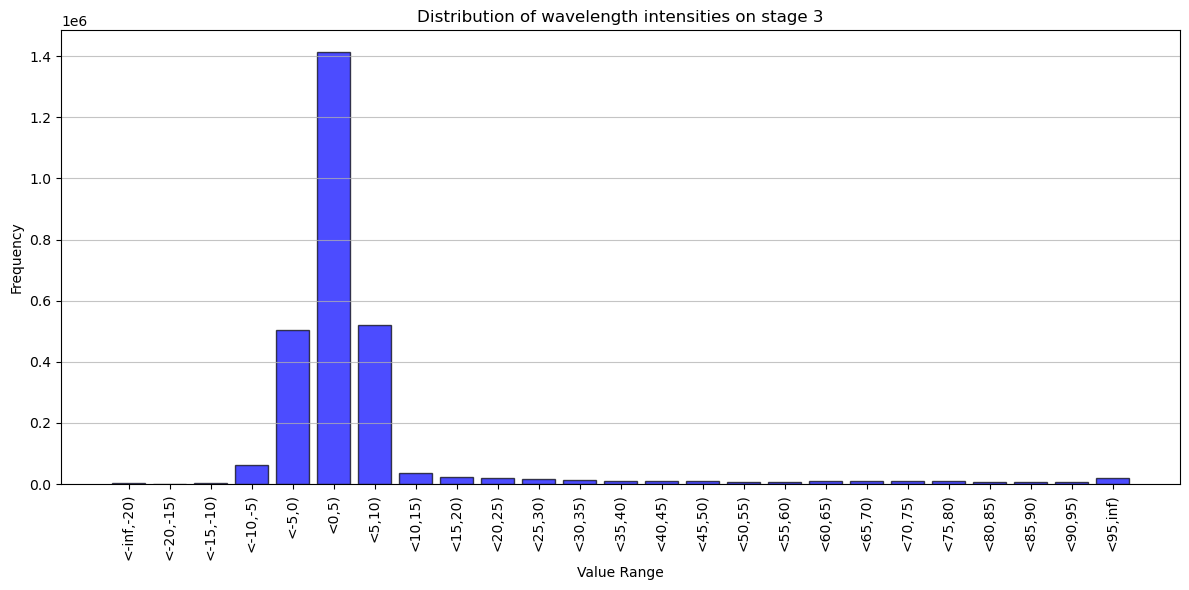

In [12]:
custom_bin_histogram(all_intensities_stg3, "Distribution of wavelength intensities on stage 3")

Bin counts:
  <-inf,-20): 6510 values
  <-20,-15): 13837 values
  <-15,-10): 48001 values
  <-10,-5): 148291 values
  <-5,0): 400385 values
  <0,5): 749372 values
  <5,10): 792343 values
  <10,15): 438393 values
  <15,20): 125314 values
  <20,25): 23231 values
  <25,30): 4574 values
  <30,35): 1049 values
  <35,40): 414 values
  <40,45): 202 values
  <45,50): 114 values
  <50,55): 82 values
  <55,60): 48 values
  <60,65): 25 values
  <65,70): 28 values
  <70,75): 19 values
  <75,80): 8 values
  <80,85): 6 values
  <85,90): 2 values
  <90,95): 3 values
  <95,inf): 261 values


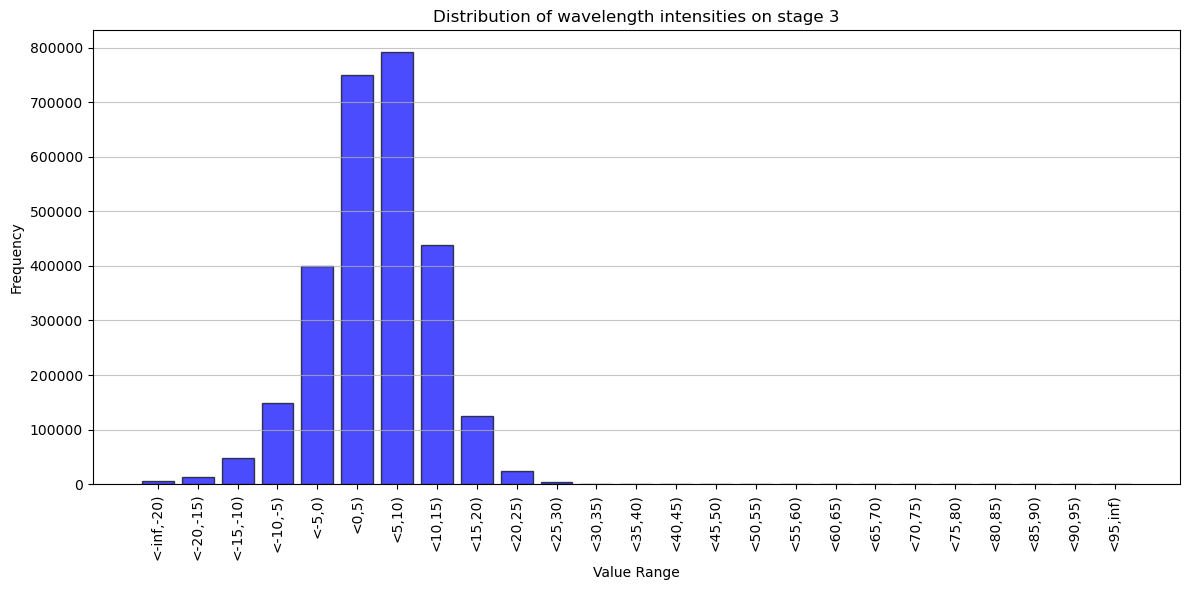

In [13]:
custom_bin_histogram(all_intensities_stg4, "Distribution of wavelength intensities on stage 3")

In [14]:
from matplotlib.colors import LogNorm

def create_spectrogram(wavelengths, intensities, label="Spectrogram of Intensities by Wavelength"):
    """
    Create and display a spectrogram-like plot.

    Parameters:
        wavelengths (numpy.ndarray): 1D array of wavelength values.
        intensities (numpy.ndarray): 2D array where each row corresponds to intensities for a wavelength.

    Returns:
        None: Displays the spectrogram.
    """
    # Flatten the wavelengths and intensities into paired values
    all_wavelengths = np.tile(wavelengths, len(intensities))
    all_intensities = np.concatenate(intensities)

    # Define bins for the 2D histogram
    wavelength_bins = np.linspace(min(wavelengths), max(wavelengths), len(wavelengths) + 1)
    intensity_bins = np.linspace(min(all_intensities), max(all_intensities), 100)

    # Create 2D histogram
    histogram, x_edges, y_edges = np.histogram2d(all_wavelengths, all_intensities, bins=[wavelength_bins, intensity_bins])

    # Plot the spectrogram with a logarithmic color scale
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(x_edges, 
                   y_edges, 
                   histogram.T, 
                   shading='auto', 
                   cmap='viridis', 
                   norm=LogNorm(vmin=1, vmax=histogram.max()))
    plt.colorbar(label='Number of Occurrences (Log Scale)')
    plt.xlabel('Wavelengths')
    plt.ylabel('Intensities')
    plt.title(label)
    plt.tight_layout()
    plt.show()


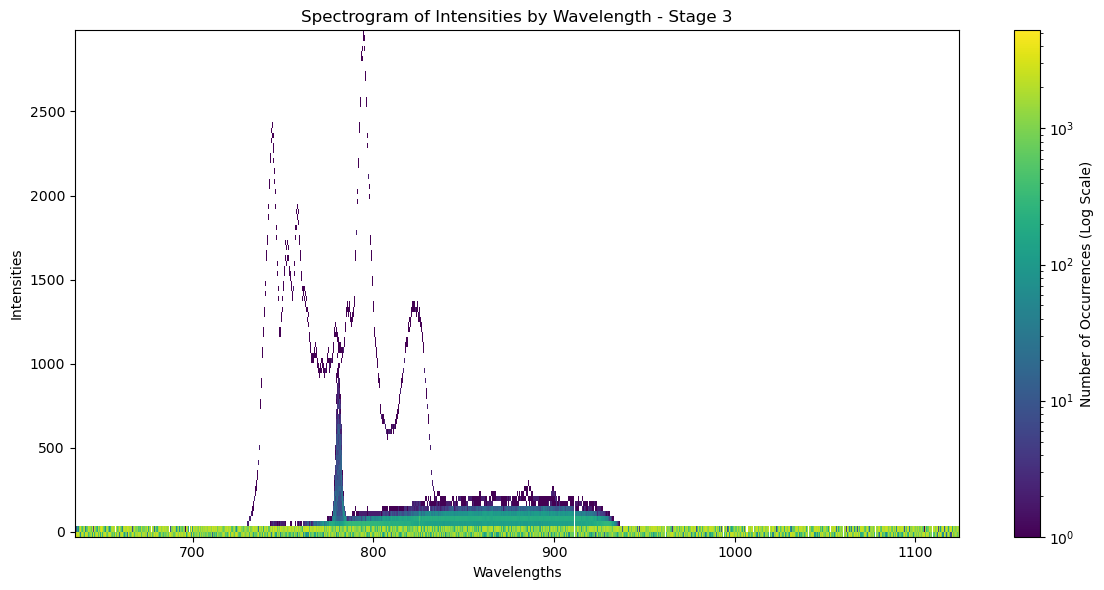

In [15]:
wavelengths = np.array(eval(data_stg3['Wavelengths'].iloc[0]))
intensities = data_stg3['Intensities'].apply(eval).values

create_spectrogram(wavelengths, intensities, label="Spectrogram of Intensities by Wavelength - Stage 3")

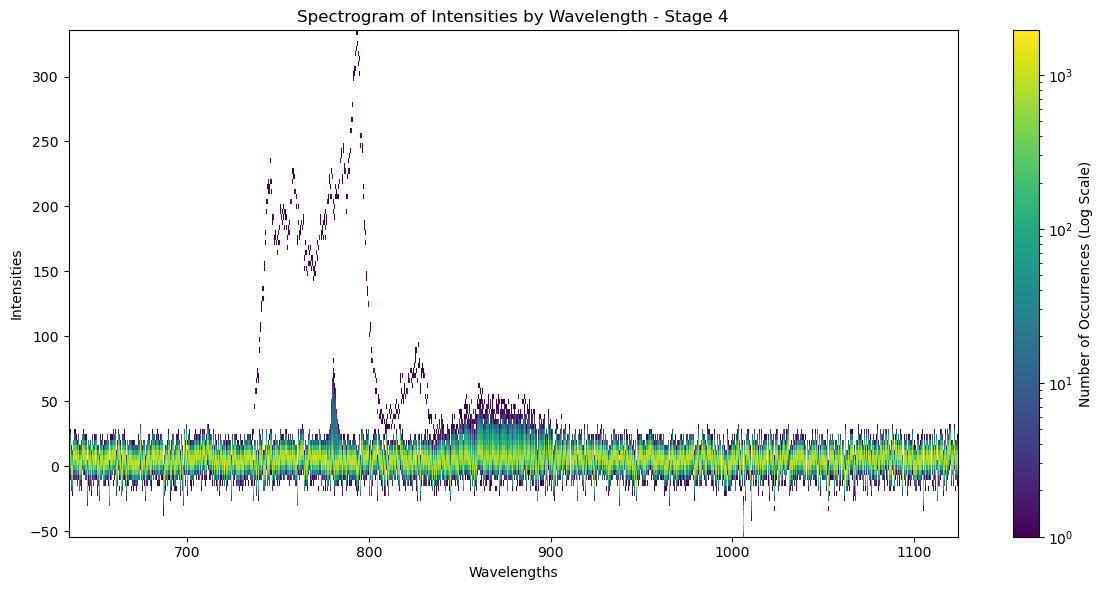

In [16]:
wavelengths = np.array(eval(data_stg4['Wavelengths'].iloc[0]))
intensities = data_stg4['Intensities'].apply(eval).values

create_spectrogram(wavelengths, intensities, label="Spectrogram of Intensities by Wavelength - Stage 4")

## Identify outliers

In [17]:
lower_bound_stg3 = np.percentile(all_intensities_stg3, 0.1)
upper_bound_stg3 = np.percentile(all_intensities_stg3, 99.9)

print(f"Typical range of stage 3: {lower_bound_stg3} to {upper_bound_stg3}")

# Identify outliers
outliers_stg3 = all_intensities_stg3[(all_intensities_stg3 < lower_bound_stg3) | (all_intensities_stg3 > upper_bound_stg3)]

print(f"Outliers: {outliers_stg3}")

Typical range of stage 3: -14.96604355599999 to 149.4495099090198
Outliers: [150.403164 153.940573 151.360579 ... 155.27005  152.389119 -18.207995]


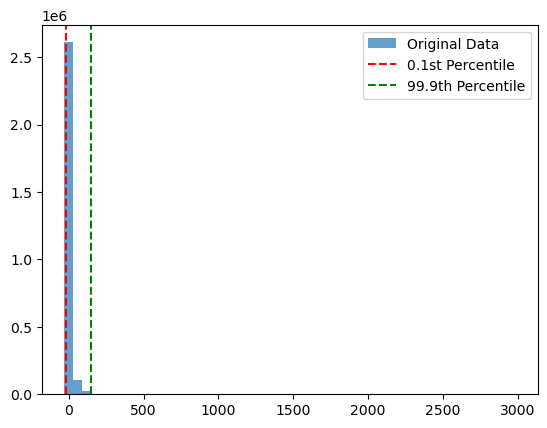

In [18]:
plt.hist(all_intensities_stg3, bins=50, alpha=0.7, label="Original Data")
plt.axvline(lower_bound_stg3, color='r', linestyle='--', label="0.1st Percentile")
plt.axvline(upper_bound_stg3, color='g', linestyle='--', label="99.9th Percentile")
plt.legend()
plt.show()

In [19]:
lower_bound_stg4 = np.percentile(all_intensities_stg4, 0.1)
upper_bound_stg4 = np.percentile(all_intensities_stg4, 99.9)

print(f"Typical range of stage 4: {lower_bound_stg4} to {upper_bound_stg4}")

# Identify outliers
outliers_stg4 = all_intensities_stg4[(all_intensities_stg4 < lower_bound_stg4) | (all_intensities_stg4 > upper_bound_stg4)]

print(f"Outliers: {outliers_stg4}")

Typical range of stage 4: -29.70777 to 29.05111
Outliers: [ 29.75846  32.05632  29.40201 ...  32.05339  31.34214 -48.29063]


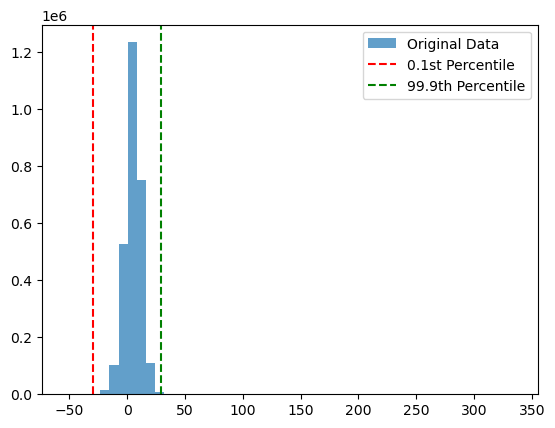

In [20]:
plt.hist(all_intensities_stg4, bins=50, alpha=0.7, label="Original Data")
plt.axvline(lower_bound_stg4, color='r', linestyle='--', label="0.1st Percentile")
plt.axvline(upper_bound_stg4, color='g', linestyle='--', label="99.9th Percentile")
plt.legend()
plt.show()

## Normalization

In [21]:
def clip_and_normalize(data, lower_bound, upper_bound):
    # Clip the data
    clipped_data = np.clip(data, lower_bound, upper_bound)
    
    # Normalize the clipped data between 0 and 1
    min_val = lower_bound
    max_val = upper_bound
    
    normalized_data = (clipped_data - min_val) / (max_val - min_val)
    
    return normalized_data

In [22]:
processed_data_stg3['intensities'] = processed_data_stg3['intensities'].apply(lambda x: clip_and_normalize(eval(x), 
                                                    lower_bound_stg3, 
                                                    upper_bound_stg3))
processed_data_stg3.head()

/tmp/ipykernel_134673/3685359428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data_stg3['intensities'] = processed_data_stg3['intensities'].apply(lambda x: clip_and_normalize(eval(x),


,time_spectrum,time_parameters,idx,intensities,cond_vector
0,2024-06-17 08:59:33.032441616,2024-06-17 08:59:32.858325005,143,"[0.09356189382212435, 0.04310447768865002, 0.0...","[0.162824, 0.0, -176387.0]"
1,2024-06-17 08:59:34.139300823,2024-06-17 08:59:32.858325005,143,"[0.06923329524552424, 0.0613509266211001, 0.08...","[0.162824, 0.0, -176387.0]"
2,2024-06-17 09:09:29.938064575,2024-06-17 09:09:28.918118000,2718,"[0.11789049239872446, 0.04918662733280005, 0.0...","[-0.015209, 0.0, -176387.0]"
3,2024-06-17 09:09:30.844064236,2024-06-17 09:09:28.918118000,2718,"[0.1057261931104244, 0.07351522590940016, 0.04...","[-0.015209, 0.0, -176387.0]"
4,2024-06-17 09:09:31.748065472,2024-06-17 09:09:28.918118000,2718,"[0.08747974417797431, 0.0613509266211001, 0.06...","[-0.015209, 0.0, -176387.0]"


In [23]:
processed_data_stg4['intensities'] = processed_data_stg4['intensities'].apply(lambda x: clip_and_normalize(eval(x), 
                                                    lower_bound_stg4, 
                                                    upper_bound_stg4))
processed_data_stg4.head()

/tmp/ipykernel_134673/360522846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data_stg4['intensities'] = processed_data_stg4['intensities'].apply(lambda x: clip_and_normalize(eval(x),


,time_spectrum,time_parameters,idx,intensities,cond_vector
0,2024-06-17 08:59:14.669630527,2024-06-17 08:59:14.472586155,88,"[0.5403795987942588, 0.3963171183657687, 0.346...","[0.121451, 0.0, 0.157127, 0.0, -176387.0, -289..."
1,2024-06-17 08:59:15.522633553,2024-06-17 08:59:14.472586155,88,"[0.5063421903208501, 0.4303545268391773, 0.414...","[0.121451, 0.0, 0.157127, 0.0, -176387.0, -289..."
2,2024-06-17 08:59:33.183339119,2024-06-17 08:59:32.858325005,143,"[0.47230478184744157, 0.32824230141895144, 0.3...","[0.162824, 0.0, 0.265351, 0.0, -176387.0, -289..."
3,2024-06-17 08:59:34.237629414,2024-06-17 08:59:32.858325005,143,"[0.5403795987942588, 0.3963171183657687, 0.346...","[0.162824, 0.0, 0.265351, 0.0, -176387.0, -289..."
4,2024-06-17 09:01:04.464854240,2024-06-17 09:01:04.373449802,516,"[0.6424918242144846, 0.4984293437859945, 0.346...","[0.149876, 0.0, 0.240917, 0.0, -176387.0, -289..."
